# Setup

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.style.use('seaborn')

In [2]:
def plot_total(run_folder: str, rho_folder: str, state: str):
    run_folder_path = os.path.join(os.path.abspath('../'), 'records', run_folder)
    rho_folder_path = os.path.join(run_folder_path, rho_folder)
    
    df = pd.DataFrame(columns=['t1', 't2', 'Value'])
    
    for filename in os.listdir(rho_folder_path):
        match = re.match(r'[A-Z]+_[A-Z]+_[A-Z]+_[A-Z]+_T1=(\d+)_T2=(\d+)_(\d+\.\d+)_totals.csv', filename)
        
        if match == None:
            continue
        
        t1 = int(match.groups()[0])
        t2 = int(match.groups()[1])
        
        totals_df = pd.read_csv(os.path.join(rho_folder_path, filename))
        value = totals_df.iloc[-1][state]
        
        row = {'t1': t1, 't2': t2, 'Value': value}
        
        new_df = pd.DataFrame([row])
        df = pd.concat([df, new_df], axis=0, ignore_index=True)
        
    result = df.pivot(index='t1', columns='t2', values='Value')
    ax = sns.heatmap(result, annot=True, cmap=sns.color_palette("Blues", as_cmap=True))
    ax.invert_yaxis()
    
    plt.title(f'Total {state}')

    plt.show()

In [3]:
def plot_curve(run_folder: str, rho_folder: str, func):
    run_folder_path = os.path.join(os.path.abspath('../'), 'records', run_folder)
    rho_folder_path = os.path.join(run_folder_path, rho_folder)
    
    df = pd.DataFrame(columns=['t1', 't2', 'Value'])
    
    for filename in os.listdir(rho_folder_path):
        match = re.match(r'[A-Z]+_[A-Z]+_[A-Z]+_[A-Z]+_T1=(\d+)_T2=(\d+)_(\d+\.\d+)_totals.csv', filename)
        
        if match == None:
            continue
        
        t1 = int(match.groups()[0])
        t2 = int(match.groups()[1])
        
        states_df = pd.read_csv(os.path.join(rho_folder_path, filename))
        value = func(states_df['Hospitalised'].values)
        
        row = {'t1': t1, 't2': t2, 'Value': value}
        
        new_df = pd.DataFrame([row])
        df = pd.concat([df, new_df], axis=0, ignore_index=True)
        
    result = df.pivot(index='t1', columns='t2', values='Value')
    ax = sns.heatmap(result, annot=True, cmap=sns.color_palette("Blues", as_cmap=True))
    ax.invert_yaxis()
    
    plt.title(f'Hospitalised {func.__name__}')

    plt.show()

In [4]:
def peak (x):
    return np.max(x)

def spread (x):
    return np.std(x)

# Rho = 0.100

c:\Users\lucas\anaconda3\envs\network-models\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


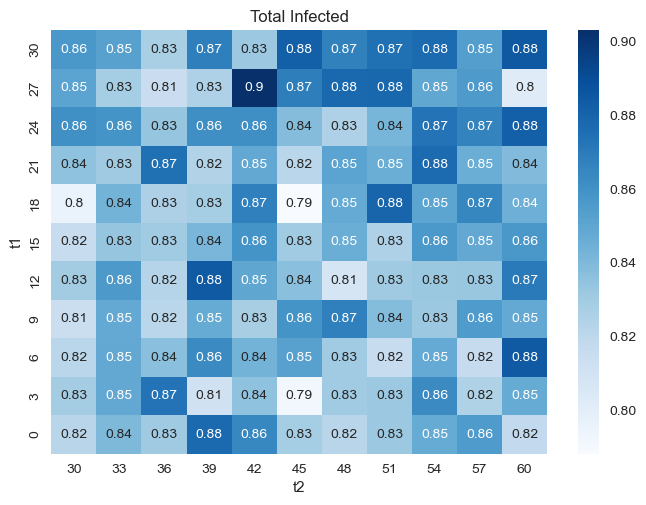

In [5]:
plot_total(run_folder='time_dependent', rho_folder='rho=0.100', state='Infected')

c:\Users\lucas\anaconda3\envs\network-models\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


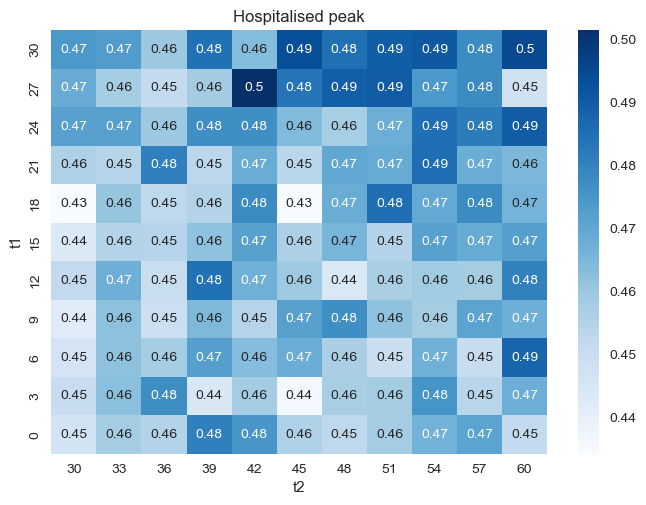

In [6]:
plot_curve(run_folder='time_dependent', rho_folder='rho=0.100', func=peak)

c:\Users\lucas\anaconda3\envs\network-models\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


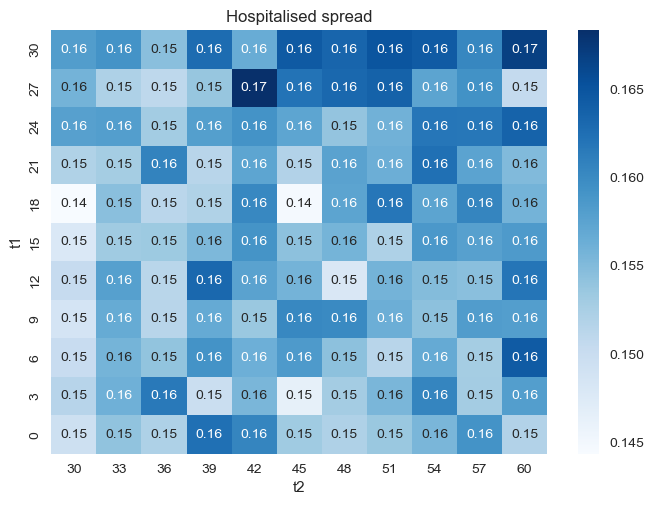

In [7]:
plot_curve(run_folder='time_dependent', rho_folder='rho=0.100', func=spread)

# Rho = 0.250

c:\Users\lucas\anaconda3\envs\network-models\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


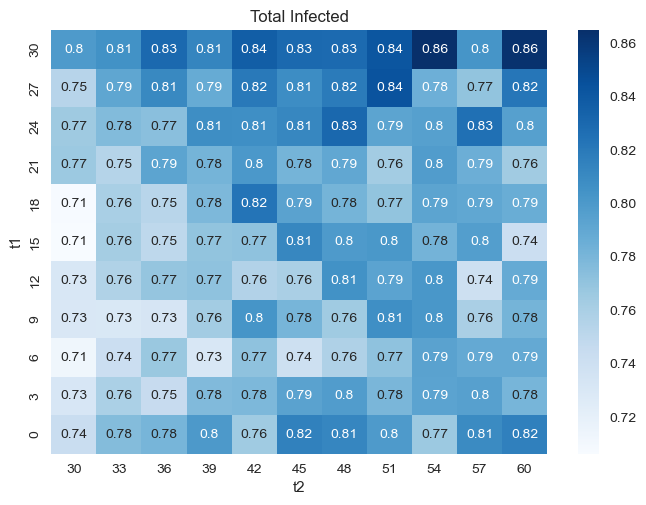

In [8]:
plot_total(run_folder='time_dependent', rho_folder='rho=0.250', state='Infected')

c:\Users\lucas\anaconda3\envs\network-models\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


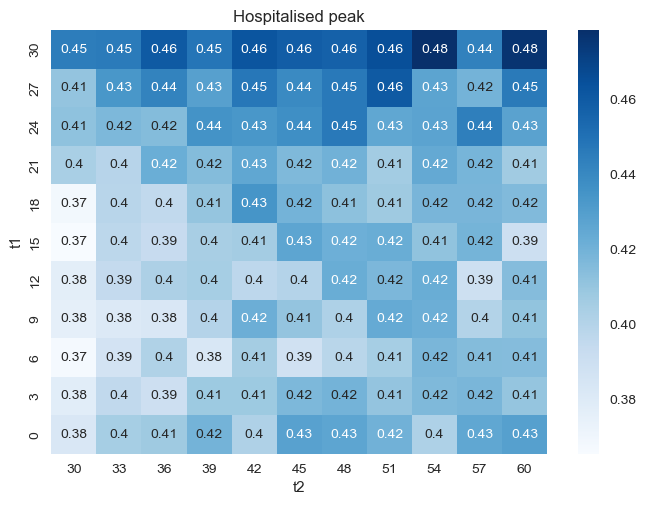

In [9]:
plot_curve(run_folder='time_dependent', rho_folder='rho=0.250', func=peak)

c:\Users\lucas\anaconda3\envs\network-models\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


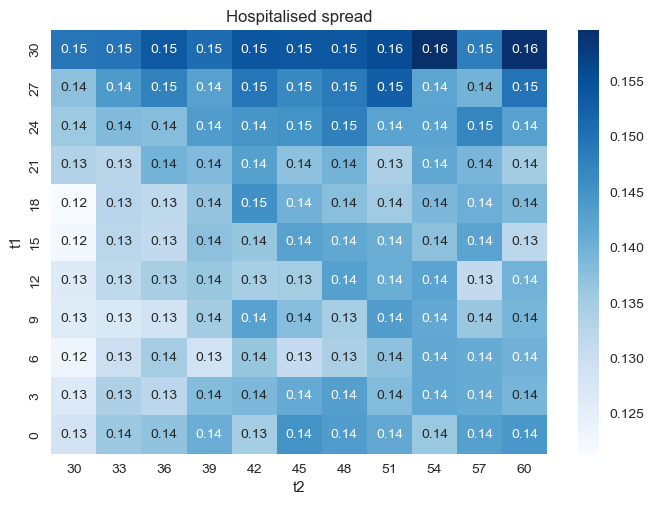

In [10]:
plot_curve(run_folder='time_dependent', rho_folder='rho=0.250', func=spread)